In [6]:

from sklearn.metrics import classification_report

import keras 
import numpy as np
from keras.preprocessing.text import Tokenizer
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, Dropout, Embedding, LSTM, Flatten
from keras.models import Model
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
plt.style.use('ggplot')
#%matplotlib inline
from IPython.core.display import display, HTML
import logging
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.externals import joblib


from sklearn.linear_model import SGDClassifier
from sklearn import preprocessing
   


c:\program files\python36\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


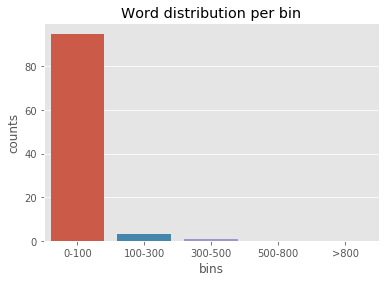

In [93]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

accuracy={}
df = pd.read_csv('C://Users//rupadhyay//Desktop//ML//Defect classification and forecasting//Data//UI_Def2.csv',delimiter=',',encoding='latin-1')
df= df.dropna()
#df = df[df.Severity.apply(lambda x: x.isnumeric())]
df = df[df.Category.apply(lambda x: x !="")]
df = df[df.Category.apply(lambda x: x !="")]
df.describe()

df.head()



df.Category.value_counts()

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text
    
df['Description'] = df['Description'].apply(clean_text)

le = preprocessing.LabelEncoder()
df['target'] = le.fit_transform(df['Category'])

#df['target'] = df.Category.astype('category').cat.codes


df['num_words'] = df.Description.apply(lambda x : len(x.split()))


bins=[0,50,75, np.inf]
df['bins']=pd.cut(df.num_words, bins=[0,100,300,500,800, np.inf], labels=['0-100', '100-300', '300-500','500-800' ,'>800'])

word_distribution = df.groupby('bins').size().reset_index().rename(columns={0:'counts'})

word_distribution.head()

sns.barplot(x='bins', y='counts', data=word_distribution).set_title("Word distribution per bin")
df.head(10)

num_class = len(np.unique(df.Category.values))
y = df['target'].values

X_train_1, X_test_1, y_train, y_test = train_test_split(df.Description.values, y, test_size=0.3)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        (None, 500)               0         
_________________________________________________________________
embedding_13 (Embedding)     (None, 500, 128)          145024    
_________________________________________________________________
flatten_10 (Flatten)         (None, 64000)             0         
_________________________________________________________________
dense_25 (Dense)             (None, 32)                2048032   
_________________________________________________________________
dense_26 (Dense)             (None, 6)                 198       
Total params: 2,193,254
Trainable params: 2,193,254
Non-trainable params: 0
_________________________________________________________________
Train on 51 samples, validate on 18 samples
Epoch 1/100
51/51 [==============================] - 3s 68ms/step - loss: 1.9613 - acc: 

51/51 [==============================] - 1s 11ms/step - loss: 0.0019 - acc: 1.0000 - val_loss: 2.2073 - val_acc: 0.1111

Epoch 00083: val_acc did not improve from 0.27778
Epoch 84/100
51/51 [==============================] - 1s 12ms/step - loss: 0.0019 - acc: 1.0000 - val_loss: 2.2087 - val_acc: 0.1111

Epoch 00084: val_acc did not improve from 0.27778
Epoch 85/100
51/51 [==============================] - 1s 12ms/step - loss: 0.0018 - acc: 1.0000 - val_loss: 2.2109 - val_acc: 0.1111

Epoch 00085: val_acc did not improve from 0.27778
Epoch 86/100
51/51 [==============================] - 1s 11ms/step - loss: 0.0018 - acc: 1.0000 - val_loss: 2.2113 - val_acc: 0.1111

Epoch 00086: val_acc did not improve from 0.27778
Epoch 87/100
51/51 [==============================] - 1s 11ms/step - loss: 0.0017 - acc: 1.0000 - val_loss: 2.2143 - val_acc: 0.1111

Epoch 00087: val_acc did not improve from 0.27778
Epoch 88/100
51/51 [==============================] - 1s 11ms/step - loss: 0.0017 - acc: 1.00

c:\users\rupadhyay\python 3.6\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


['C://Users//rupadhyay//Desktop//ML//Defect classification and forecasting//Data//Results2//RNN_model.sav']

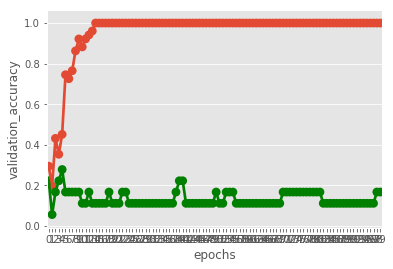

In [94]:
#####RNN###############

MAX_LENGTH = 500
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train_1)
post_seq = tokenizer.texts_to_sequences(X_train_1)
post_seq_padded = pad_sequences(post_seq, maxlen=MAX_LENGTH)

X_train=post_seq_padded

tokenizer.fit_on_texts(X_test_1)
post_seq_test = tokenizer.texts_to_sequences(X_test_1)
post_seq_padded_test = pad_sequences(post_seq_test, maxlen=MAX_LENGTH)

X_test=post_seq_padded_test

#X_train, X_test, y_train, y_test = train_test_split(post_seq_padded, y, test_size=0.3)

vocab_size = len(tokenizer.word_index) + 1


inputs = Input(shape=(MAX_LENGTH, ))
embedding_layer = Embedding(vocab_size,
                            128,
                            input_length=MAX_LENGTH)(inputs)
x = Flatten()(embedding_layer)
x = Dense(32, activation='relu')(x)

predictions = Dense(num_class, activation='softmax')(x)
model = Model(inputs=[inputs], outputs=predictions)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])


model.summary()
filepath="weights-simple.hdf5"
checkpointer = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
history = model.fit([X_train], batch_size=10, y=to_categorical(y_train), verbose=1, validation_split=0.25, 
          shuffle=True, epochs=100, callbacks=[checkpointer])

#history = model.fit([X_train], batch_size=10, y=y_train, verbose=1, validation_split=0.25, 
 #         shuffle=True, epochs=100, callbacks=[checkpointer])

df1 = pd.DataFrame({'epochs':history.epoch, 'accuracy': history.history['acc'], 'validation_accuracy': history.history['val_acc']})
g = sns.pointplot(x="epochs", y="accuracy", data=df1, fit_reg=False)
g = sns.pointplot(x="epochs", y="validation_accuracy", data=df1, fit_reg=False, color='green')


predicted = model.predict(X_test)
predicted = np.argmax(predicted, axis=1)
accuracy_score(y_test, predicted)
accuracy['RNN']=accuracy_score(y_test, predicted)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predicted)

predicted = le.inverse_transform(predicted)

pd.DataFrame(cm).to_csv('C://Users//rupadhyay//Desktop//ML//Defect classification and forecasting//Data//Results2//RNN_confusion.csv')  

'''print((classification_report(y_test, predicted)))
type(report)
pd.DataFrame(report).to_csv('C://Users//rupadhyay//Desktop//ML//Defect classification and forecasting//Data//Results2//RNN_classification.csv')'''

####Reverse dictionary

predictions_human_readable = np.column_stack((X_test_1, predicted))


labelled_data=pd.DataFrame(predictions_human_readable,columns=['Description','Label'])

labelled_data.reset_index().to_csv('C://Users//rupadhyay//Desktop//ML//Defect classification and forecasting//Data//Results2//RNN_results.csv')     
#####Pickle the file####
filename = 'C://Users//rupadhyay//Desktop//ML//Defect classification and forecasting//Data//Results2//RNN_model.sav'
joblib.dump(model, filename)


In [98]:
##############################SVM##########################

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=15, tol=None)),
               ])
sgd.fit(X_train_1, y_train)


y_pred = sgd.predict(X_test_1)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy['SVM']=accuracy_score(y_test, y_pred)



print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

y_pred = le.inverse_transform(y_pred)
predictions_file = np.column_stack((X_test_1, y_pred))

pd.DataFrame(cm).to_csv('C://Users//rupadhyay//Desktop//ML//Defect classification and forecasting//Data//Results2//SVM_confusion.csv')  

'''pd.DataFrame(classification_report(y_test, predicted)).to_csv('C://Users//rupadhyay//Desktop//ML//Defect classification and forecasting//Data//Results2//SVM_classification.csv')'''  


labelled_data_SVM=pd.DataFrame(predictions_file,columns=['Description','Label'])
labelled_data_SVM.reset_index().to_csv('C://Users//rupadhyay//Desktop//ML//Defect classification and forecasting//Data//Results2//SVM_results.csv')     
#####Pickle the file####
filename = 'C://Users//rupadhyay//Desktop//ML//Defect classification and forecasting//Data//Results2//SVM_model.sav'
joblib.dump(sgd, filename)


accuracy 0.5666666666666667
             precision    recall  f1-score   support

          1       0.64      0.54      0.58        13
          2       0.38      0.50      0.43         6
          3       0.62      1.00      0.77         5
          4       0.00      0.00      0.00         3
          5       1.00      0.67      0.80         3

avg / total       0.55      0.57      0.55        30

             precision    recall  f1-score   support

          1       0.64      0.54      0.58        13
          2       0.38      0.50      0.43         6
          3       0.62      1.00      0.77         5
          4       0.00      0.00      0.00         3
          5       1.00      0.67      0.80         3

avg / total       0.55      0.57      0.55        30



c:\users\rupadhyay\python 3.6\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


['C://Users//rupadhyay//Desktop//ML//Defect classification and forecasting//Data//Results2//SVM_model.sav']

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        (None, 500)               0         
_________________________________________________________________
embedding_14 (Embedding)     (None, 500, 128)          145024    
_________________________________________________________________
lstm_4 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_27 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_28 (Dense)             (None, 6)                 198       
Total params: 196,710
Trainable params: 196,710
Non-trainable params: 0
_________________________________________________________________
Train on 51 samples, validate on 18 samples
Epoch 1/100
51/51 [==============================] - 2s 47ms/step - loss: 1.7942 - acc: 0.03


Epoch 00083: val_acc did not improve from 0.27778
Epoch 84/100
51/51 [==============================] - 1s 19ms/step - loss: 0.0923 - acc: 1.0000 - val_loss: 2.7284 - val_acc: 0.1111

Epoch 00084: val_acc did not improve from 0.27778
Epoch 85/100
51/51 [==============================] - 1s 19ms/step - loss: 0.0876 - acc: 1.0000 - val_loss: 2.7237 - val_acc: 0.1111

Epoch 00085: val_acc did not improve from 0.27778
Epoch 86/100
51/51 [==============================] - 1s 16ms/step - loss: 0.0802 - acc: 1.0000 - val_loss: 2.6666 - val_acc: 0.1111

Epoch 00086: val_acc did not improve from 0.27778
Epoch 87/100
51/51 [==============================] - 1s 17ms/step - loss: 0.0703 - acc: 1.0000 - val_loss: 2.5901 - val_acc: 0.1111

Epoch 00087: val_acc did not improve from 0.27778
Epoch 88/100
51/51 [==============================] - 1s 17ms/step - loss: 0.0631 - acc: 1.0000 - val_loss: 2.5541 - val_acc: 0.1111

Epoch 00088: val_acc did not improve from 0.27778
Epoch 89/100
51/51 [=========

c:\users\rupadhyay\python 3.6\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


['C://Users//rupadhyay//Desktop//ML//Defect classification and forecasting//Data//Results2//LSTM_model.sav']

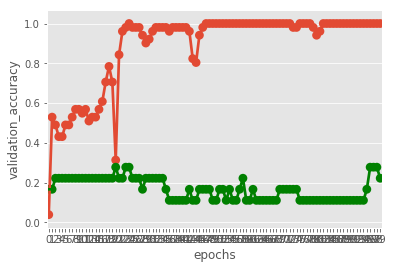

In [99]:
##################LSTM####################

inputs = Input(shape=(MAX_LENGTH, ))
embedding_layer = Embedding(vocab_size,
                            128,
                            input_length=MAX_LENGTH)(inputs)

x = LSTM(64)(embedding_layer)
x = Dense(32, activation='relu')(x)
predictions = Dense(num_class, activation='softmax')(x)
model = Model(inputs=[inputs], outputs=predictions)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

model.summary()


filepath="weights.hdf5"
checkpointer = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
history = model.fit([X_train], batch_size=50, y=to_categorical(y_train), verbose=1, validation_split=0.25, 
          shuffle=True, epochs=100, callbacks=[checkpointer])


df2 = pd.DataFrame({'epochs':history.epoch, 'accuracy': history.history['acc'], 'validation_accuracy': history.history['val_acc']})
g = sns.pointplot(x="epochs", y="accuracy", data=df2, fit_reg=False)
g = sns.pointplot(x="epochs", y="validation_accuracy", data=df2, fit_reg=False, color='green')



model.load_weights('weights.hdf5')
predicted = model.predict(X_test)

predicted = np.argmax(predicted, axis=1)

accuracy_score(y_test, predicted)
accuracy['LSTM']=accuracy_score(y_test, predicted)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predicted)
pd.DataFrame(cm).to_csv('C://Users//rupadhyay//Desktop//ML//Defect classification and forecasting//Data//Results2//LSTM_confusion.csv')  


'''print(classification_report(y_test, predicted))

pd.DataFrame(classification_report(y_test, predicted)).to_csv('C://Users//rupadhyay//Desktop//ML//Defect classification and forecasting//Data//Results2//LSTM_classification.csv')  '''

####Reverse dictionary

predicted = le.inverse_transform(predicted)
predictions_human_readable = np.column_stack((X_test_1, predicted))



labelled_data=pd.DataFrame(predictions_human_readable,columns=['Description','Label'])
labelled_data.reset_index().to_csv('C://Users//rupadhyay//Desktop//ML//Defect classification and forecasting//Data//Results2//LSTM_results.csv')     
#####Pickle the file####
filename = 'C://Users//rupadhyay//Desktop//ML//Defect classification and forecasting//Data//Results2//LSTM_model.sav'
joblib.dump(model, filename)



In [85]:
######LogReg################
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train_1, y_train)
y_pred = logreg.predict(X_test_1)

print('accuracy %s' % accuracy_score(y_pred, y_test))

accuracy_score(y_test, y_pred)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)


print(classification_report(y_test, y_pred))
accuracy['LogReg']=accuracy_score(y_test, y_pred)

cm = confusion_matrix(y_test,y_pred)
pd.DataFrame(cm).to_csv('C://Users//rupadhyay//Desktop//ML//Defect classification and forecasting//Data//Results2//LR_confusion.csv')  


'''print(classification_report(y_test, y_pred))




pd.DataFrame(classification_report(y_test, y_pred)).to_csv('C://Users//rupadhyay//Desktop//ML//Defect classification and forecasting//Data//Results2//LR_classification.csv')  '''

y_pred = le.inverse_transform(y_pred)
predictions_file = np.column_stack((X_test_1, y_pred))



labelled_data_LR=pd.DataFrame(predictions_file,columns=['Description','Label'])
labelled_data_LR.reset_index().to_csv('C://Users//rupadhyay//Desktop//ML//Defect classification and forecasting//Data//Results2//LR_results.csv')  

####Saving the model
# save the model to disk
filename = 'C://Users//rupadhyay//Desktop//ML//Defect classification and forecasting//Data//Results2//LogReg_model.sav'
joblib.dump(logreg, filename)




accuracy 0.4
             precision    recall  f1-score   support

          1       0.27      0.38      0.32         8
          2       0.42      0.62      0.50         8
          3       0.60      0.75      0.67         4
          4       0.00      0.00      0.00         5
          5       0.50      0.20      0.29         5

avg / total       0.35      0.40      0.35        30



c:\users\rupadhyay\python 3.6\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\rupadhyay\python 3.6\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


['C://Users//rupadhyay//Desktop//ML//Defect classification and forecasting//Data//Results2//LogReg_model.sav']

In [86]:
#########Naive Bayes###########

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train_1, y_train)


from sklearn.metrics import classification_report
y_pred = nb.predict(X_test_1)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))
accuracy['NB']=accuracy_score(y_test, y_pred)



cm = confusion_matrix(y_test,y_pred)
pd.DataFrame(cm).to_csv('C://Users//rupadhyay//Desktop//ML//Defect classification and forecasting//Data//Results2//NB_confusion.csv')  

y_pred = le.inverse_transform(y_pred)
predictions_file = np.column_stack((X_test_1, y_pred))

labelled_data_NB=pd.DataFrame(predictions_file,columns=['Description','Label'])
labelled_data_NB.reset_index().to_csv('C://Users//rupadhyay//Desktop//ML//Defect classification and forecasting//Data//Results2//NB_results.csv')     

pd.Series(accuracy).to_csv('C://Users//rupadhyay//Desktop//ML//Defect classification and forecasting//Data//Results2//Accuracy.csv')  

#####Pickle the file####
filename = 'C://Users//rupadhyay//Desktop//ML//Defect classification and forecasting//Data//Results2//NB_model.sav'
joblib.dump(nb, filename)







accuracy 0.43333333333333335
             precision    recall  f1-score   support

          1       0.32      1.00      0.48         8
          2       1.00      0.38      0.55         8
          3       1.00      0.50      0.67         4
          4       0.00      0.00      0.00         5
          5       0.00      0.00      0.00         5

avg / total       0.49      0.43      0.36        30



c:\users\rupadhyay\python 3.6\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\rupadhyay\python 3.6\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


['C://Users//rupadhyay//Desktop//ML//Defect classification and forecasting//Data//Results2//NB_model.sav']

In [88]:
##############XGBOOST##################
import  xgboost, string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm

# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram_chars.fit(df['Description'])
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(X_train_1) 
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(X_test_1) 

clf=xgboost.XGBClassifier().fit(xtrain_tfidf_ngram_chars.tocsc(), y_train)

predictions = clf.predict(xvalid_tfidf_ngram_chars)
accuracy['XGB']=metrics.accuracy_score(predictions, y_test)    

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predictions)



pd.DataFrame(cm).to_csv('C://Users//rupadhyay//Desktop//ML//Defect classification and forecasting//Data//Results2//XGB_char_confusion.csv')  

predictions = le.inverse_transform(predictions)
predictions_file = np.column_stack((X_test_1, predictions))

labelled_data_XGB=pd.DataFrame(predictions_file,columns=['Description','Label'])
labelled_data_XGB.reset_index().to_csv('C://Users//rupadhyay//Desktop//ML//Defect classification and forecasting//Data//Results2//XGB_results.csv')  
#######Pickel the model##########
filename = 'C://Users//rupadhyay//Desktop//ML//Defect classification and forecasting//Data//Results2//XGB_model.sav'
Vectorizer='C://Users//rupadhyay//Desktop//ML//Defect classification and forecasting//Data//Results2//XGB_vectorizer.sav'
joblib.dump(clf, filename)
joblib.dump(tfidf_vect_ngram_chars,Vectorizer)



c:\users\rupadhyay\python 3.6\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\users\rupadhyay\python 3.6\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


['C://Users//rupadhyay//Desktop//ML//Defect classification and forecasting//Data//Results2//XGB_vectorizer.sav']

In [90]:
#########SVM ngram chars#############
clf_SVM=SGDClassifier().fit(xtrain_tfidf_ngram_chars.tocsc(), y_train)
predictions = clf_SVM.predict(xvalid_tfidf_ngram_chars)

accuracy['SVM_ngram']=metrics.accuracy_score(predictions, y_test)    

cm_svm_new = confusion_matrix(y_test,predictions)

predictions = le.inverse_transform(predictions)
predictions_file_svm_new = np.column_stack((X_test_1, predictions))

pd.DataFrame(cm_svm_new).to_csv('C://Users//rupadhyay//Desktop//ML//Defect classification and forecasting//Data//Results2//SVM_char_confusion.csv')  
labelled_data_SVM_new=pd.DataFrame(predictions_file,columns=['Description','Label'])
labelled_data_SVM_new.reset_index().to_csv('C://Users//rupadhyay//Desktop//ML//Defect classification and forecasting//Data//Results2//SVM_char_results.csv')  

#######Pickel the model##########
filename = 'C://Users//rupadhyay//Desktop//ML//Defect classification and forecasting//Data//Results2//SVM_ngram_model.sav'
joblib.dump(clf_SVM, filename)






c:\users\rupadhyay\python 3.6\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
c:\users\rupadhyay\python 3.6\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


['C://Users//rupadhyay//Desktop//ML//Defect classification and forecasting//Data//Results2//SVM_ngram_model.sav']

In [101]:
#####Selction based on accuracy
import scipy.stats
import operator
type(accuracy)
Key=max(accuracy.items(), key=operator.itemgetter(1))[0]
Value=accuracy[max(accuracy.items(), key=operator.itemgetter(1))[0]]

#Load the new data
data_to_predict = pd.read_csv('C://Users//rupadhyay//Desktop//ML//Defect classification and forecasting//Data//More_Defects_6_11_UI.csv',delimiter=',',encoding='latin-1')
#data_to_predict= data_to_predict.dropna()
#df = df[df.Severity.apply(lambda x: x.isnumeric())]
data_to_predict = data_to_predict[data_to_predict.Category.apply(lambda x: x !="")]
#data_to_predict = data_to_predict[data_to_predict.Category.apply(lambda x: x !="")]
data_to_predict.describe()
data_to_predict.columns
data_to_predict.head()
X_test_predict=data_to_predict['Description']

# load the model

filename_toload='C://Users//rupadhyay//Desktop//ML//Defect classification and forecasting//Data//Results2//'+Key+'_model.sav'
loaded_model = joblib.load(filename_toload)
if(Key=="XGB"):
    load_vectorizer=joblib.load('C://Users//rupadhyay//Desktop//ML//Defect classification and forecasting//Data//Results2//'+Key+'_vectorizer.sav')
    X_test_predict=load_vectorizer.transform(X_test_predict)
result = loaded_model.predict(X_test_predict)

#predictions_file1 = np.column_stack((X_test_1, result))

result = le.inverse_transform(result)
print(result)
data_to_predict['Predicted Label']=result

#labelled_data_final=pd.DataFrame(predictions_file1,columns=['Description','Label'])
#type(labelled_data_final['Label'][0])
###Map of labels###
map_label={
#0:	'Environment Issue',
#1:	'Data Integrity',
#2:	'Functional Issue',
#3:	'Syntax Issue',
#4:	'Date Issue',
#5:	'Duplicate Issue',
#6:	'Spool Issue',
}

if 'Category' in data_to_predict.columns:
    data_to_predict=data_to_predict.drop(['Category'],axis=1)

#data_to_predict['Predicted Label'] = data_to_predict['Predicted Label'].map(map_label)
data_to_predict.to_csv('C://Users//rupadhyay//Desktop//ML//Defect classification and forecasting//Data//Results2//Final_results.csv') 


['Component visibility' 'Export Issue' 'Component visibility'
 'Export Issue' 'Data Integrity' 'Export Issue' 'Component visibility'
 'Component visibility' 'Export Issue' 'Export Issue' 'Data Integrity'
 'Export Issue' 'Export Issue' 'Export Issue' 'Component visibility'
 'Component visibility' 'Data Integrity' 'Data Integrity' 'Export Issue'
 'Component visibility' 'Component visibility' 'Export Issue'
 'Export Issue' 'Data Integrity' 'Data Integrity' 'Data Integrity'
 'Export Issue' 'Component visibility' 'Component visibility'
 'Data Integrity' 'Data Integrity' 'Export Issue' 'Component visibility'
 'Component visibility' 'Component visibility' 'Performance Issue'
 'Data Integrity' 'Data Integrity' 'Component visibility' 'Export Issue'
 'Data Integrity' 'Component visibility' 'Data Integrity'
 'Component visibility' 'Component visibility' 'Component visibility'
 'Component visibility' 'Component visibility' 'Data Integrity'
 'Data Integrity' 'Component visibility' 'Component visibi

c:\users\rupadhyay\python 3.6\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [96]:
filename_toload

'C://Users//rupadhyay//Desktop//ML//Defect classification and forecasting//Data//Results2//RNN_model.sav'

In [100]:
accuracy

{'RNN': 0.26666666666666666,
 'SVM': 0.5666666666666667,
 'LSTM': 0.36666666666666664}